# <font color = 'blue'>Effect of PCA on Classification models including Random Forest, Logistic regression and SVM on the Digit recognizer MNIST dataset</font>

## Importing all the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import time as tym
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Importing the data

In [3]:
'''The dataset was downloaded from kaggle, where the whole data 
was pre-divided into train and test sets
the test set will be run by the kaggle interface 
to calculate the accuracy of each of the models present here'''

train = pd.read_csv("C:\\Users\\harip\\Downloads\\digit-recognizer\\train.csv")

test = pd.read_csv("C:\\Users\\harip\\Downloads\\digit-recognizer\\test.csv")

## Analysing the data

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# there are no missing values in the training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [7]:
# In the test data as well, there are no missing data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [8]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [9]:
print(f'The dimensions of the training and the test data are: \n {train.shape},{test.shape}')

The dimensions of the training and the test data are: 
 (42000, 785),(28000, 784)


In [10]:
# the number of labels in the dataset
label_list = list(np.sort(train['label'].unique()))

print(f'The list of the labels in the dataset is as follows: \n {label_list}')

The list of the labels in the dataset is as follows: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Splitting the data into dependant and independant variables

In [11]:
train_data = train.drop(['label'],axis=1)

train_label = train['label']

### Normalizing the data 

In [12]:
train_data = train_data/255
test = test/255

In [13]:
train_data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Splitting the x data into training and testing data 

In [14]:
x_train,x_test,y_train,y_test = train_test_split(train_data,train_label,
                                                 test_size = 0.2, random_state=0)

In [15]:
print(f'Training dataset dimensions: {x_train.shape}' )

print(f'Number of training labels: {len(y_train)}')

print(f'Testing dataset dimensions: {x_test.shape}')

print(f'Number of testing labels: {len(y_test)}')

Training dataset dimensions: (33600, 784)
Number of training labels: 33600
Testing dataset dimensions: (8400, 784)
Number of testing labels: 8400


In [16]:
# computing the number of distribution of the label,
# from the distribution of the labels below, 
# we can conclude that this data set is a balanced one!

train_nums,train_dist = np.unique(y_train,return_counts=True)

test_nums,test_dist = np.unique(y_test,return_counts=True)

print(f'The training distribution is given as: {dict(zip(train_nums,train_dist))}')

print(f'The testing distribution is given as: {dict(zip(test_nums,test_dist))}')


The training distribution is given as: {0: 3319, 1: 3723, 2: 3317, 3: 3488, 4: 3245, 5: 3039, 6: 3296, 7: 3502, 8: 3295, 9: 3376}
The testing distribution is given as: {0: 813, 1: 961, 2: 860, 3: 863, 4: 827, 5: 756, 6: 841, 7: 899, 8: 768, 9: 812}


## Visualizing the distribution of the labels

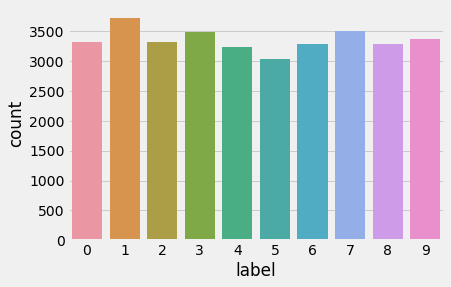

In [17]:
# distribution of the training labels

sb.countplot(y_train)
plt.show()

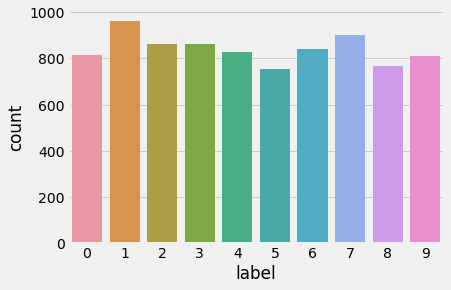

In [18]:
# distribution of the testing labels

sb.countplot(y_test)
plt.show()

### Visualising the data

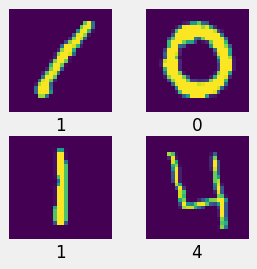

In [19]:
plt.figure(figsize = (4,4))
for i in range (4) :
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(train_label[i])
    plt.imshow(train_data.iloc[i,:].values.reshape(28,28))

### Defining a function that returns the accuracy of a particular classifier

In [20]:
def classify_score(classifier,data,label,ratio):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(data,label,train_size=ratio,random_state=0)
    classifier.fit(Xtrain,Ytrain)
    return classifier.score(Xtest,Ytest)

### Applying PCA to find out the number of components needed for capturing most of the variance in the data

In [21]:
# An array containing a random set of PCA component numbers 

components_array = np.array([5,10,15,20,25,30,50,150,200,400,500])

# this array will store the %of variance each element in the above array can capture
variance_array = np.zeros(len(components_array))
h = 0

for element in components_array:
    princip_comp = PCA(n_components=element)
    princip_comp.fit(train_data)
    variance_array[h] = sum(princip_comp.explained_variance_ratio_)
    h+=1

In [22]:
variance_array

array([0.33328671, 0.48916732, 0.58051495, 0.64476809, 0.69330241,
       0.73184624, 0.82552507, 0.94822289, 0.96618812, 0.9957994 ,
       0.99925056])

### The Scree plot 

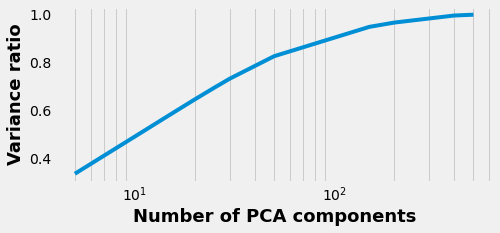

In [23]:
# around 100 PCA components capture 90% of the variance in the data

plt.figure(figsize=(7,3))
plt.plot(components_array,variance_array)
plt.xscale('log')
plt.xlabel('Number of PCA components',fontweight='bold',size = 18)
plt.ylabel('Variance ratio',fontweight='bold',size = 18)
plt.grid(which='both')
plt.show()

## Visualizing the distribution of several classes using a plot of PCA Components

In [24]:
# choosing the number of components to be 2, so as to visualize the distribution 

pca = PCA(n_components=2)

pca.fit(train_data)

train_decomposed = pca.transform(train_data)

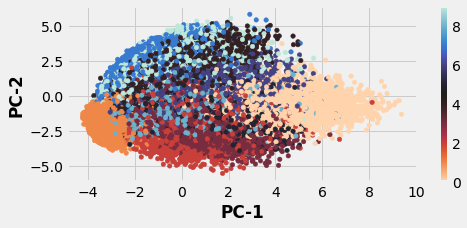

In [25]:
#the below figure beautifully shows how each label is distributed

plt.figure(figsize=(7,3))
plt.scatter(train_decomposed[:,0],train_decomposed[:,1],s=20,c=train_label,cmap='icefire_r')
plt.colorbar()
plt.xlabel('PC-1',fontweight = 'bold')
plt.ylabel('PC-2',fontweight = 'bold')
plt.show()

## Training a logistic regression model

In [26]:
# softmax classifier is used since it is a problem of multi class classification

soft_max = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=20)

soft_max.fit(x_train,y_train)

LogisticRegression(C=20, multi_class='multinomial')

In [27]:
y_pred_softmax = soft_max.predict(x_test)

In [28]:
# testing accuracy
softmax_test_accuarcy = soft_max.score(x_test,y_test)

# training accuracy
softmax_train_accuarcy=soft_max.score(x_train,y_train)
print('The training and testing accuracies of the logistic regression model respectively are:')
print(f'{round(softmax_train_accuarcy,3)} and {round(softmax_test_accuarcy,3)}')

The training and testing accuracies of the logistic regression model respectively are:
0.942 and 0.918


## Logistic Regression + PCA

In [29]:
# finding the optimal number of PCA Components for logistic regression,
# using 5000 data points from the training data

array_of_accuracies = np.zeros(len(components_array))
j=0

for component in components_array:
    Pca = PCA(n_components=component)
    Pca.fit(train_data)
    array_of_accuracies[j] = classify_score(classifier=soft_max,
                                            data=Pca.transform(train_data.iloc[0:5000]),
                                            label=train_label.iloc[0:5000],ratio=0.75)
    j+=1

In [30]:
array_of_accuracies

array([0.6736, 0.8024, 0.8424, 0.8736, 0.8808, 0.8848, 0.9024, 0.8648,
       0.868 , 0.88  , 0.8832])

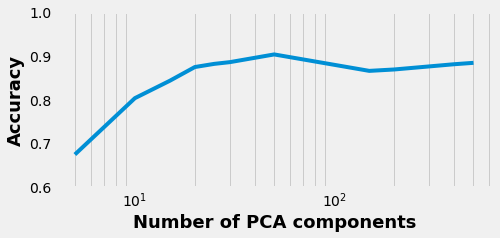

In [31]:
#plotting the number of PCA components Vs the Variance ratio
# at 50 components the accuracy is the highest, hence taking number of PCA components = 50

plt.figure(figsize = (7,3))
plt.plot(components_array,array_of_accuracies)
plt.xscale('log')
plt.ylim(0.6,1,0.05)
plt.xlabel('Number of PCA components',fontweight='bold',size = 18)
plt.ylabel('Accuracy',fontweight='bold',size = 18)
plt.grid(which='both')
plt.show()


In [32]:
Pca = PCA(n_components=50)

Pca.fit(x_train)

x_train_new = Pca.transform(x_train)

x_test_new = Pca.transform(x_test)

In [33]:
soft_max_pca = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=20)

soft_max_pca.fit(x_train_new,y_train)

LogisticRegression(C=20, multi_class='multinomial')

In [34]:
y_pred_softmax_pca = soft_max_pca.predict(x_test_new)

In [35]:
# testing accuracy
softmax_test_pca_accuarcy = soft_max_pca.score(x_test_new,y_test)

# training accuracy
softmax_train_pca_accuarcy=soft_max_pca.score(x_train_new,y_train)

print('The training and testing accuracies of the logistic regression model respectively are:')
print(f'{round(softmax_train_pca_accuarcy,3)} and {round(softmax_test_pca_accuarcy,3)}')

The training and testing accuracies of the logistic regression model respectively are:
0.909 and 0.914


## Training a Random forest classifier

### Finding out the optimal number of estimators

In [36]:
# a function which calculates the mean and standard deviation of the accuracies
# obtained from several samples of training data

def score_mean_std(array_of_estimators,n_samples,data,label,ratio):
    
    # this array will store the mean score value of all the n_samples of data, 
    # which were fitted on the random forest classifier
    mean_scores = np.zeros(len(array_of_estimators))
    
    # this array will store the standard deviation of
    # score value of all the n_samples of data, 
    # which were fitted on the random forest classifier
    std_scores = np.zeros(len(array_of_estimators))
    h = 0
    
    for x in array_of_estimators:
        score_array = np.zeros(n_samples)
        for i in range(n_samples):
            classifier = RandomForestClassifier(n_estimators=x,n_jobs=1,criterion='gini')
            score_array[i] = classify_score(classifier,data,label,ratio)
        mean_scores[h], std_scores[h] = np.mean(score_array), np.std(score_array)
        h+=1
    return mean_scores, std_scores

In [37]:
# taking the first 5000 data points to train the randomforest classifier

mean_scores, std_scores = score_mean_std(array_of_estimators = np.array([10,50,100,150,200,300,350,450,500]), 
               n_samples = 5, data = train_data.iloc[0:5000],
               label = train_label.iloc[0:5000],ratio = 0.75)

In [38]:
print(f'The array of the mean accuracy for several values of estimators is: \n {mean_scores}')

print(f"The array of the standard deviation of estimator accuracy is: \n {std_scores}")

The array of the mean accuracy for several values of estimators is: 
 [0.876   0.9216  0.92352 0.92864 0.93008 0.9304  0.93328 0.93056 0.92944]
The array of the standard deviation of estimator accuracy is: 
 [0.00772321 0.00262907 0.00148378 0.00496774 0.00224    0.00237318
 0.00129985 0.0023406  0.00093295]


### Plotting the error bar of accuracy vs no. of estimators

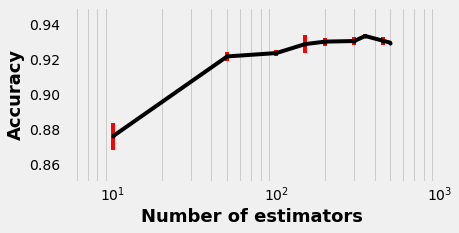

In [39]:
# the optimal number of estimators for which the accuracy is the highest is 300

plt.figure(figsize=(6,3))
plt.errorbar(x=np.array([10,50,100,150,200,300,350,450,500]), 
             y = mean_scores,yerr = std_scores,fmt = 'k.-',ecolor = 'red')
plt.xscale('log')
plt.xlabel('Number of estimators',fontweight = 'bold',size = 18)
plt.ylabel('Accuracy',fontweight = 'bold',size = 18)
plt.xlim(5,1000)
plt.ylim(0.85,0.95)
plt.grid(which='both')
plt.show()

### Fitting the random forest classifier for 300 estimators

In [40]:
RandomForest = RandomForestClassifier(n_estimators=300,n_jobs=1,criterion='gini')

RandomForest.fit(x_train,y_train)

y_pred_RandomForest = RandomForest.predict(x_test)

In [41]:
RandomForest_train_accuracy = RandomForest.score(x_train,y_train)

RandomForest_test_accuracy = RandomForest.score(x_test,y_test)

print(f'The training score is: {RandomForest_train_accuracy}')

print(f'The testing score is: {RandomForest_test_accuracy}')

The training score is: 1.0
The testing score is: 0.965952380952381


## Random forest + PCA

In [42]:
# finding the optimal number of PCA Components for logistic regression,
# using 5000 data points

array_of_accuracies = np.zeros(len(components_array))
j=0

for component in components_array:
    Pca = PCA(n_components=component)
    Pca.fit(train_data)
    array_of_accuracies[j] = classify_score(classifier=RandomForest,
                                            data=Pca.transform(train_data.iloc[0:5000]),
                                            label=train_label.iloc[0:5000],ratio=0.75)
    j+=1

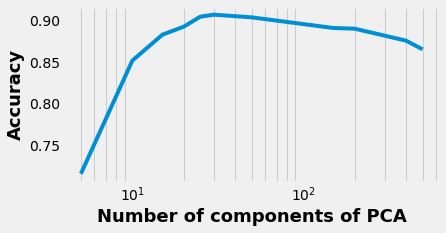

In [43]:
#plotting the graph of accuracies vs the number of pca components
# at around 50 pca components the accuracy seems to be the highest

plt.figure(figsize = (6,3))
plt.plot(components_array,array_of_accuracies)
plt.xscale('log')
plt.xlabel('Number of components of PCA',fontweight = 'bold',size = 18)
plt.ylabel('Accuracy',fontweight = 'bold',size = 18)
plt.grid(which='both')
plt.show()


### Applying 50 PCA components and training the Random Forest classifier

In [44]:
Pca = PCA(n_components=50)

Pca.fit(x_train)

x_train_new = Pca.transform(x_train)

x_test_new = Pca.transform(x_test)

In [45]:
RandomForest_pca = RandomForestClassifier(n_estimators=300,criterion='gini',n_jobs=1)

RandomForest_pca.fit(x_train_new,y_train)

y_pred_RandomForest_pca = RandomForest_pca.predict(x_test_new)

In [46]:
RandomForest_train_pca_accuracy = RandomForest_pca.score(x_train_new,y_train)

RandomForest_test_pca_accuracy = RandomForest_pca.score(x_test_new,y_test)

print(f'The training score is: {RandomForest_train_pca_accuracy}')

print(f'The testing score is: {RandomForest_test_pca_accuracy}')

The training score is: 1.0
The testing score is: 0.950595238095238


## Training a SVM Classifier

### Training a linear SVM with standard hyperparameters

In [47]:
SVMlinear = SVC(kernel = 'linear')

SVMlinear.fit(x_train,y_train)

y_pred_SVMlinear = SVMlinear.predict(x_test)

In [48]:
SVMlinear_train_accuracy = SVMlinear.score(x_train,y_train)

SVMlinear_test_accuracy = SVMlinear.score(x_test,y_test)

print(f'The training score is: {SVMlinear_train_accuracy}')

print(f'The testing score is: {SVMlinear_test_accuracy}')

The training score is: 0.9795238095238096
The testing score is: 0.9321428571428572


## Training non-linear SVM 

### Polynomial kernel

In [49]:
SVMpoly = SVC(kernel='poly')

SVMpoly.fit(x_train,y_train)

y_pred_SVMpoly=SVMpoly.predict(x_test)

In [50]:
SVMpoly_train_accuracy = SVMpoly.score(x_train,y_train)

SVMpoly_test_accuracy = SVMpoly.score(x_test,y_test)

print(f'The training score is: {SVMpoly_train_accuracy}')

print(f'The testing score is: {SVMpoly_test_accuracy}')

The training score is: 0.9906547619047619
The testing score is: 0.9705952380952381


### RBF kernel

In [51]:
SVMrbf = SVC(kernel='rbf')

SVMrbf.fit(x_train,y_train)

y_pred_SVMrbf = SVMrbf.predict(x_test)

In [52]:
SVMrbf_train_accuracy = SVMrbf.score(x_train,y_train)

SVMrbf_test_accuracy = SVMrbf.score(x_test,y_test)

print(f'The training score is: {SVMrbf_train_accuracy}')

print(f'The testing score is: {SVMrbf_test_accuracy}')

The training score is: 0.9892559523809524
The testing score is: 0.9747619047619047


### Finding the optimal number of PCA Components for each type of Support Vector classifier

### Linear SVM

In [53]:
# finding the optimal number of PCA Components for Linear SVM,
# using 5000 data points

array_of_accuracies_linear = np.zeros(len(components_array))
j=0

for component in components_array:
    Pca = PCA(n_components=component)
    Pca.fit(train_data)
    array_of_accuracies_linear[j] = classify_score(classifier=SVMlinear,
                                                   data=Pca.transform(train_data.iloc[0:5000]),
                                                   label=train_label.iloc[0:5000],ratio=0.75)
    j+=1

In [54]:
array_of_accuracies_linear

array([0.6976, 0.8336, 0.8736, 0.8936, 0.9048, 0.9   , 0.9104, 0.9008,
       0.9088, 0.9128, 0.9104])

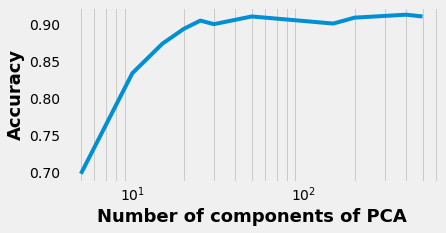

In [55]:
#plotting the graph of accuracies vs the number of pca components
# at around 50 pca components the accuracy seems to be the highest

plt.figure(figsize = (6,3))
plt.plot(components_array,array_of_accuracies_linear)
plt.xscale('log')
plt.xlabel('Number of components of PCA',fontweight = 'bold',size = 18)
plt.ylabel('Accuracy',fontweight = 'bold',size = 18)
plt.grid(which='both')
plt.show()

### Polynomial kernel SVM

In [56]:
# finding the optimal number of PCA Components for Polynomial SVM,
# using 5000 data points

array_of_accuracies_poly = np.zeros(len(components_array))
j=0

for component in components_array:
    Pca = PCA(n_components=component)
    Pca.fit(train_data)
    array_of_accuracies_poly[j] = classify_score(classifier=SVMpoly,
                                                 data=Pca.transform(train_data.iloc[0:5000]),
                                                 label=train_label.iloc[0:5000],ratio=0.75)
    j+=1

In [57]:
array_of_accuracies_poly

array([0.712 , 0.8872, 0.9184, 0.944 , 0.9464, 0.9536, 0.9528, 0.9504,
       0.948 , 0.9456, 0.9448])

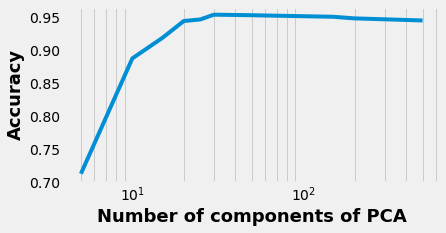

In [58]:
#plotting the graph of accuracies vs the number of pca components
# at around 50 pca components the accuracy seems to be the highest

plt.figure(figsize = (6,3))
plt.plot(components_array,array_of_accuracies_poly)
plt.xscale('log')
plt.xlabel('Number of components of PCA',fontweight = 'bold',size = 18)
plt.ylabel('Accuracy',fontweight = 'bold',size = 18)
plt.grid(which='both')
plt.show()


### RBF Kernel SVM

In [59]:
# finding the optimal number of PCA Components for RBF SVM,
# using 5000 data points

array_of_accuracies_rbf = np.zeros(len(components_array))
j=0

for component in components_array:
    Pca = PCA(n_components=component)
    Pca.fit(train_data)
    array_of_accuracies_rbf[j] = classify_score(classifier=SVMrbf,data=Pca.transform(train_data.iloc[0:5000]),
                   label=train_label.iloc[0:5000],ratio=0.75)
    j+=1

In [60]:
array_of_accuracies_rbf

array([0.7352, 0.8968, 0.932 , 0.944 , 0.9488, 0.9504, 0.9552, 0.9512,
       0.9488, 0.9488, 0.948 ])

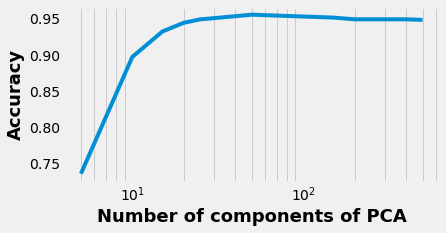

In [61]:
#plotting the graph of accuracies vs the number of pca components
# at around 50 pca components the accuracy seems to be the highest

plt.figure(figsize = (6,3))
plt.plot(components_array,array_of_accuracies_rbf)
plt.xscale('log')
plt.xlabel('Number of components of PCA',fontweight = 'bold',size = 18)
plt.ylabel('Accuracy',fontweight = 'bold',size = 18)
plt.grid(which='both')
plt.show()


### Fitting a 50 component PCA and transforming the training and testing data

In [62]:
Pca = PCA(n_components=50)

Pca.fit(x_train)

x_train_new = Pca.transform(x_train)

x_test_new = Pca.transform(x_test)

### SVM Linear kernel + PCA

In [63]:
SVMlinear_pca = SVC(kernel = 'linear')

SVMlinear_pca.fit(x_train_new,y_train)

y_pred_SVMlinear_pca = SVMlinear_pca.predict(x_test_new)

In [64]:
SVMlinear_train_pca_accuracy = SVMlinear_pca.score(x_train_new,y_train)

SVMlinear_test_pca_accuracy = SVMlinear_pca.score(x_test_new,y_test)

print(f'The training score is: {SVMlinear_train_pca_accuracy}')

print(f'The testing score is: {SVMlinear_test_pca_accuracy}')

The training score is: 0.9402678571428571
The testing score is: 0.9345238095238095


### SVM Polynomial Kernel + PCA

In [65]:
SVMpoly_pca = SVC(kernel = 'poly')

SVMpoly_pca.fit(x_train_new,y_train)

y_pred_SVMpoly_pca = SVMpoly_pca.predict(x_test_new)

In [66]:
SVMpoly_train_pca_accuracy = SVMpoly_pca.score(x_train_new,y_train)

SVMpoly_test_pca_accuracy = SVMpoly_pca.score(x_test_new,y_test)

print(f'The training score is: {SVMpoly_train_pca_accuracy}')

print(f'The testing score is: {SVMpoly_test_pca_accuracy}')

The training score is: 0.9931547619047619
The testing score is: 0.9786904761904762


### SVM RBF Kernel + PCA

In [67]:
SVMrbf_pca = SVC(kernel = 'rbf')

SVMrbf_pca.fit(x_train_new,y_train)

y_pred_SVMrbf_pca = SVMrbf_pca.predict(x_test_new)

In [68]:
SVMrbf_train_pca_accuracy = SVMpoly_pca.score(x_train_new,y_train)

SVMrbf_test_pca_accuracy = SVMpoly_pca.score(x_test_new,y_test)

print(f'The training score is: {SVMrbf_train_pca_accuracy}')

print(f'The testing score is: {SVMrbf_test_pca_accuracy}')

The training score is: 0.9931547619047619
The testing score is: 0.9786904761904762


## Finally comparing all the models for their accuracies

In [69]:
# the below dictionary will contain all the contents of the data frame

comparison = {'Classification models':
              ['Logistic regression','Logistic regression with PCA','Random Forests',
               'Random Forests with PCA','SVM Linear kernel', 'SVM Linear kernel with PCA', 
               'SVM Polynomial kernel','SVM Polynomial kernel with PCA','SVM RBF kernel',
               'SVM RBF kernel with PCA'],
              'Training Accuracy':
              [softmax_train_accuarcy,softmax_train_pca_accuarcy,RandomForest_train_accuracy,
               RandomForest_train_pca_accuracy,SVMlinear_train_accuracy,
               SVMlinear_train_pca_accuracy,SVMpoly_train_accuracy,
               SVMpoly_train_pca_accuracy,SVMrbf_train_accuracy,
               SVMrbf_train_pca_accuracy],
              'Testing Accuracy':
              [softmax_test_accuarcy,softmax_test_pca_accuarcy,RandomForest_test_accuracy,
               RandomForest_test_pca_accuracy,SVMlinear_test_accuracy,
               SVMlinear_test_pca_accuracy,
               SVMpoly_test_accuracy,SVMpoly_test_pca_accuracy,SVMrbf_test_accuracy,
               SVMrbf_test_pca_accuracy]}

# finally calling pd.DataFrame()

df = pd.DataFrame(comparison,index = np.arange(1,11,1))

In [70]:
# as it can be seen that, many models have higher accuracies when PCA is applied
# but there are models in which when PCA is applied the accuracy drops!
df

,Classification models,Training Accuracy,Testing Accuracy
1,Logistic regression,0.941548,0.917738
2,Logistic regression with PCA,0.908810,0.913810
3,Random Forests,1.000000,0.965952
4,Random Forests with PCA,1.000000,0.950595
5,SVM Linear kernel,0.979524,0.932143
6,SVM Linear kernel with PCA,0.940268,0.934524
7,SVM Polynomial kernel,0.990655,0.970595
8,SVM Polynomial kernel with PCA,0.993155,0.978690
9,SVM RBF kernel,0.989256,0.974762
10,SVM RBF kernel with PCA,0.993155,0.978690


## Applying the models on the testing data

In [71]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: float64(784)
memory usage: 167.5 MB


In [73]:
len(test)

28000

In [74]:
test.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

### Using the SVM Polynomial Kernel for the training data

### Transforming the test data 

In [75]:
Pca = PCA(n_components=50)

Pca.fit(test)

test_new = Pca.transform(test)

In [76]:
SVMpoly_pca = SVC(kernel = 'poly')

SVMpoly_pca.fit(x_train_new,y_train)

y_pred = SVMpoly_pca.predict(test_new)

In [77]:
submissions_df = pd.DataFrame()
submissions_df['ImageId'] = np.arange(1,len(test)+1,1)
submissions_df['Label'] = y_pred

In [78]:
submissions_df

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,2
4,5,4
...,...,...
27995,27996,3
27996,27997,3
27997,27998,7
27998,27999,3


In [79]:
# converting the dataframe into csv file for submitting on kaggle!
digit_submissions = submissions_df.to_csv("C:\\Users\\harip\\digit_submissions.csv",index=False)

## <font color = 'blue'>Conclusions</font>

### 1. Applying PCA may or may not increase the performance, depending on the machine learning model and various other factors

### 2. Non-linear Kernel SVMs trained on the data which was transformed by PCA out performs all the other models like linear SVM, Logistic regression and Random Forests